In [2]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(faces.data)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Cambia 0.95 por el porcentaje de varianza deseado
X = pca.fit_transform(X)
min_var(0.95, pca.explained_variance_ratio_)

121

In [28]:
#HAC 
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
hac1 = AgglomerativeClustering(linkage='single', n_clusters=40)
hac1 = hac1.fit(X)

hac2 = AgglomerativeClustering(linkage='average', n_clusters=40)
hac2 = hac2.fit(X)

hac3 = AgglomerativeClustering(linkage='complete', n_clusters=40)
hac3 = hac3.fit(X)

hac4 = AgglomerativeClustering(linkage='ward', n_clusters=40)
hac4 = hac4.fit(X)

In [29]:
from sklearn.metrics import silhouette_score

for k in range(2, 50):
    model = AgglomerativeClustering(n_clusters=k).fit(X)
    score = silhouette_score(X, model.labels_)
    print(k, score)

2 0.20630787
3 0.091273375
4 0.09082475
5 0.08876248
6 0.08248386
7 0.09167593
8 0.094377
9 0.094409026
10 0.097264655
11 0.100493886
12 0.10376297
13 0.11026491
14 0.11421004
15 0.11186907
16 0.1128307
17 0.11840215
18 0.12297031
19 0.12561569
20 0.12776934
21 0.13062786
22 0.13713832
23 0.1431215
24 0.14158106
25 0.14701487
26 0.15042031
27 0.15412083
28 0.15687685
29 0.15925628
30 0.16462436
31 0.16863914
32 0.17392436
33 0.17491062
34 0.17940795
35 0.17889541
36 0.18101284
37 0.18261768
38 0.18561949
39 0.18997413
40 0.19208404
41 0.19216423
42 0.19518432
43 0.19520363
44 0.19769873
45 0.19846794
46 0.20111363
47 0.20451578
48 0.20629269
49 0.20882584


In [30]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, hac1.labels_, metric="euclidean",))
print(silhouette_score(X, hac2.labels_, metric="euclidean",))
print(silhouette_score(X, hac3.labels_, metric="euclidean",))
print(silhouette_score(X, hac4.labels_, metric="euclidean",))

-0.015504536
0.17348547
0.17273472
0.19208404


Funcionó mejor ward

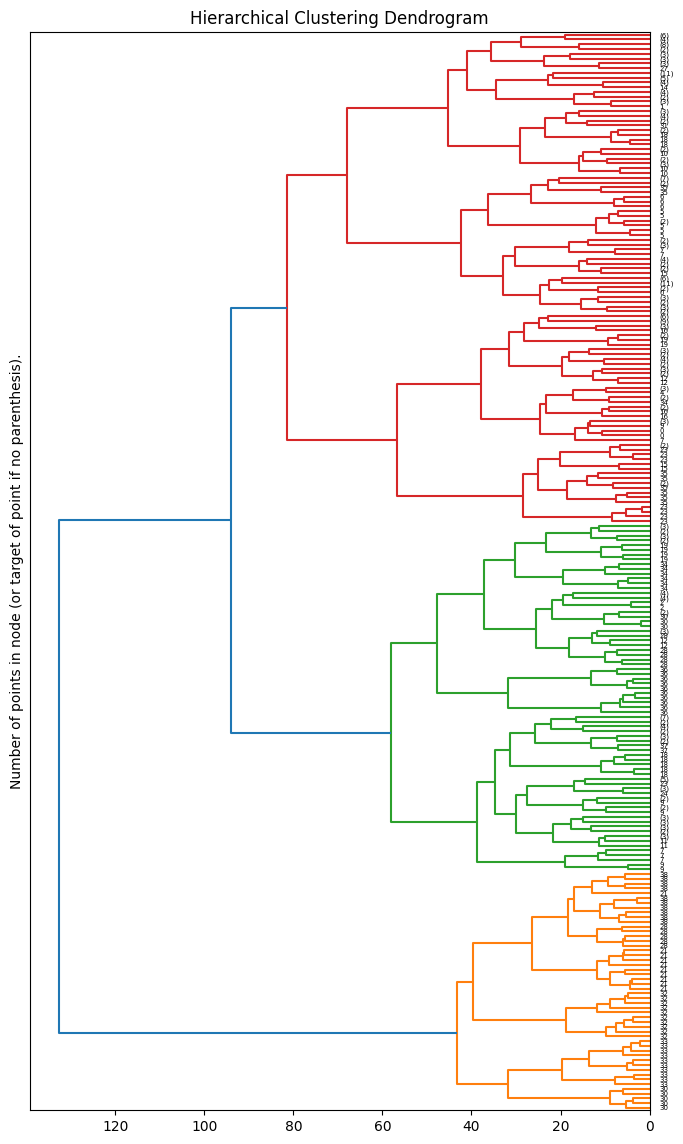

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
hac = AgglomerativeClustering(distance_threshold=0, linkage='ward', n_clusters=None)
hac = hac.fit(X)

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_) # model.labels_: cluster labels for each point
    for i, merge in enumerate(model.children_): 
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples] # in-order enumeration of nodes
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(8, 14))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hac, truncate_mode="level", p=8
, labels=y, orientation = 'left')
plt.ylabel("Number of points in node (or target of point if no parenthesis).")
plt.show()